# Fecal Coliform estimation using Support Vector Machines
Code for fitting water parameter data using SVMs

## Data import
Import the parameters and FC data from csv

In [1]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
#from sklearn import svm
#import numpy as np
#from sklearn.svm import NuSVR
import csv

Temps=[]
Precs=[]
Means=[]
Cumuls=[]
Urban_LUFs=[]
Forest_LUFs=[]
Agris=[]
FCs=[]

#Data read
with open('coli_final.csv','r') as csvfile:
	coli = csv.reader(csvfile,delimiter=",")
	for row in coli:
		#[float(i) for i in row]
		#[value for value in row]
		Temp,Cumul,Urban_LUF,Forest_LUF,Agri,FC = [float(row[0]),float(row[1]),float(row[2]),float(row[3]),float(row[4]),float(row[5])]
		Temps.append(Temp)
		Cumuls.append(Cumul)
		Urban_LUFs.append(Urban_LUF)
		Forest_LUFs.append(Forest_LUF)
		Agris.append(Agri)
		FCs.append(FC)

## SVM Regression
SVM Regression using scikit SVR

In [2]:
X=[Temps,Cumuls,Urban_LUFs,Forest_LUFs,Agris]
#X=zip(*X)
X=[list(p) for p in zip(*X)]
Y=FCs
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, Y).predict(X)
y_lin = svr_lin.fit(X, Y).predict(X)
y_poly = svr_poly.fit(X, Y).predict(X)
# clf=svm.SVC()
# clf.fit(X,Y)
# clf.predict
print ("Original Value : 3080")
print ("rbf:", end=" ")
print (svr_rbf.predict([[13.24,11.15,0.03707,0.683092,0.872937]])[0])
print ("lin:", end=" ")
print (svr_lin.predict([[13.24,11.15,0.03707,0.683092,0.872937]])[0])
print ("poly:", end=" ")
print (svr_poly.predict([[13.24,11.15,0.03707,0.683092,0.872937]])[0])

Original Value : 3080
rbf: 3579.9066802
lin: 3343.29562377
poly: 4934.78233245


### SVR Prediction for entire dataset

In [3]:
%matplotlib inline
RbfPreds=[]
LinPreds=[]
PolyPreds=[]
for row in X:
    RbfPreds.append(svr_rbf.predict([row]))
    LinPreds.append(svr_lin.predict([row]))
    PolyPreds.append(svr_poly.predict([row]))

### Scatter plots for each model

RBF


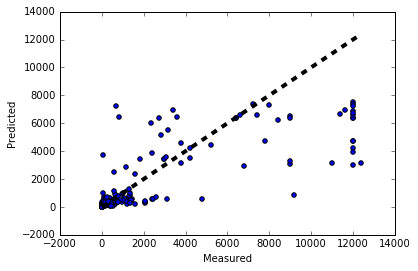

LINEAR


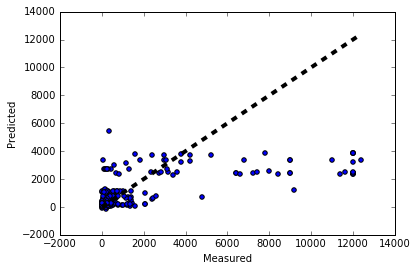

POLY


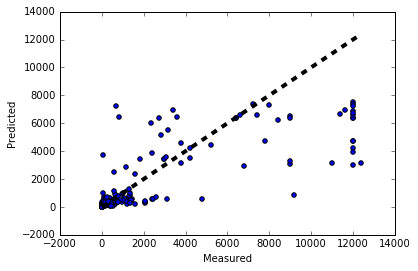

In [4]:
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(Y, RbfPreds, edgecolors=(0, 0, 0))
ax.plot([min(Y), max(Y)], [min(Y), max(Y)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("RBF")
plt.show()
fig, ax = plt.subplots()
ax.scatter(Y, LinPreds, edgecolors=(0, 0, 0))
ax.plot([min(Y), max(Y)], [min(Y), max(Y)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("LINEAR")
plt.show()
fig, ax = plt.subplots()
ax.scatter(Y, RbfPreds, edgecolors=(0, 0, 0))
ax.plot([min(Y), max(Y)], [min(Y), max(Y)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("POLY")
plt.show()

## Pearson Correlation

In [5]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return (diffprod / math.sqrt(xdiff2 * ydiff2))[0]
print("Pearson Correlation")
print("RBF",end=" ")
print(pearson(Y,RbfPreds))
print("LINEAR",end=" ")
print(pearson(Y,LinPreds))
print("POLY",end=" ")
print(pearson(Y,PolyPreds))

Pearson Correlation
RBF 0.803605104878
LINEAR 0.651948964823
POLY 0.631786132189


### Scatter plot for all points

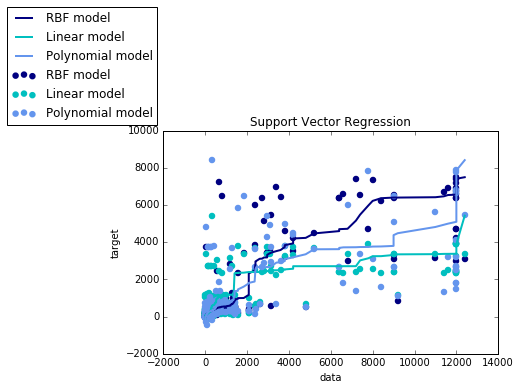

In [6]:
lw = 2
#plt.scatter(X, y, color='darkorange', label='data')
plt.plot(sorted(Y), sorted(RbfPreds), color='navy', lw=lw, label='RBF model')
plt.plot(sorted(Y), sorted(LinPreds), color='c', lw=lw, label='Linear model')
plt.plot(sorted(Y), sorted(PolyPreds), color='cornflowerblue', lw=lw, label='Polynomial model')
plt.scatter(Y, RbfPreds, color='navy', lw=lw, label='RBF model')
plt.scatter(Y, LinPreds, color='c', lw=lw, label='Linear model')
plt.scatter(Y, PolyPreds, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend(bbox_to_anchor=(0, 1), loc='lower right', ncol=1)
plt.show()

#### Data is clustered upto 500
Rest is too sparse